Import appropriate libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset

In [21]:
# file_nflDataset = r
nflDataset = pd.read_csv('/content/drive/My Drive/Data Analysis/Sports/Code/Playbyplay.csv')
# nflDataset = pd.read_csv('/content/drive/My Drive/Texas Convergent/Build Teams/F20 - Data Analysis/Data Analysis/Sports/Code/Playbyplay.csv') # Saagar's file path
# nflDataset = pd.read_csv('stuff goes here') # Sweta's file path
# nflDataset = pd.read_csv('')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
modelInput_copy = pd.read_csv('/content/drive/MyDrive/Data Analysis/Sports/Code/modelInput_copy.csv')
modelInput = pd.read_csv('/content/drive/MyDrive/Data Analysis/Sports/Code/modelInput.csv')

In [ ]:
nflDataset

In [ ]:
game_id_list = pd.unique(nflDataset["game_id"]).tolist()


In [ ]:
# nflDataset_copy = nflDataset[["game_id", "home_team", "away_team","yards_gained", "qb_scramble","touchdown","two_point_conv_result", "fourth_down_converted", "kick_distance", "replay_or_challenge_result", "penalty_yards", "interception", "fumble_lost", "sack", "return_touchdown", "punt_blocked", "game_seconds_remaining", "play_type", "home_wp"]] 


# #clean up play type
# nflDataset_copy = nflDataset_copy[nflDataset_copy.play_type.notnull()]
# nflDataset_copy = nflDataset_copy[nflDataset_copy.play_type != "no_play"]

# #clean up two-point coversion 
# for i, play in nflDataset_copy.iterrows(): 
#   if str(play["two_point_conv_result"]) == "failure":
#     nflDataset_copy["two_point_conv_result"][i]=-1
#   elif str(play["two_point_conv_result"]) == "success":
#     nflDataset_copy["two_point_conv_result"][i]=1
#   else:
#     nflDataset_copy["two_point_conv_result"][i]=0

# #clean up penalty yards
# for i, play in nflDataset_copy.iterrows():
#   if (math.isnan(play["penalty_yards"])):
#     nflDataset_copy["penalty_yards"][i]=0

# #clean up kick distance
# for i, play in nflDataset_copy.iterrows():
#   if (math.isnan(play["kick_distance"])):
#     nflDataset_copy["kick_distance"][i]= 0 #no kick attempted on play

# #clean up replay and challenge result
# for i, play in nflDataset_copy.iterrows():
#   if str(play["replay_or_challenge_result"]) == "upheld":
#     nflDataset_copy["replay_or_challenge_result"][i]=1
#   elif str(play["replay_or_challenge_result"]) == "reversed":
#    nflDataset_copy["replay_or_challenge_result"][i]=-1
#   else:
#     nflDataset_copy["replay_or_challenge_result"][i]=0 #no replays or challenge

# #clean up return touchdown
# for i, play in nflDataset_copy.iterrows():
#   if (play["return_touchdown"] == 0):
#     nflDataset_copy["return_touchdown"][i]= -1
#   if (math.isnan(play["return_touchdown"])):
#     nflDataset_copy["return_touchdown"][i]= 0

# #clean up punt blocked
# for i, play in nflDataset_copy.iterrows():
#   if (play["punt_blocked"] == 0):
#     nflDataset_copy["punt_blocked"][i]= -1
#   if (math.isnan(play["punt_blocked"])):
#     nflDataset_copy["punt_blocked"][i]= 0
#     #punt was neither blocked nor successful

# nflDataset_copy.reset_index(drop=True, inplace = True)

In [ ]:
#nflDataset_copy.to_csv(r'/content/drive/My Drive/nflDataset_copy.csv')

In [ ]:
nflDataset_copy = pd.read_csv('/content/drive/MyDrive/Data Analysis/Sports/Code/nflDataset_copy.csv')

In [ ]:
nflDataset_copy

,Unnamed: 0,game_id,home_team,away_team,yards_gained,qb_scramble,touchdown,two_point_conv_result,fourth_down_converted,kick_distance,replay_or_challenge_result,penalty_yards,interception,fumble_lost,sack,return_touchdown,punt_blocked,game_seconds_remaining,play_type,home_wp
0,0,2009091000,PIT,TEN,0.0,0,0.0,0,0.0,67.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3600.0,kickoff,NaN
1,1,2009091000,PIT,TEN,5.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3593.0,pass,0.546433
2,2,2009091000,PIT,TEN,-3.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3556.0,run,0.551088
3,3,2009091000,PIT,TEN,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3515.0,pass,0.510793
4,4,2009091000,PIT,TEN,0.0,0,0.0,0,0.0,54.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3507.0,punt,0.461217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394061,394061,2018121700,CAR,NO,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,64.0,qb_spike,0.109821
394062,394062,2018121700,CAR,NO,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,63.0,pass,0.096692
394063,394063,2018121700,CAR,NO,5.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,58.0,pass,0.074498
394064,394064,2018121700,CAR,NO,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,38.0,pass,0.032217


In [ ]:
#create DF for each game
#game_ids = nflDataset_copy.game_id.unique()

#splits = list(nflDataset_copy.groupby("game_id")) 

#df_dict = {}
#index = 0 
#for i in splits:
#  name = "Game_" + str(index) 
#  df_dict[name] = i
#  index = index + 1 


#manipulate = df_dict["Game_0"]



In [ ]:
len(game_id_list)

In [ ]:
#create DF for each game
game_ids = nflDataset_copy.game_id.unique()

splits = nflDataset_copy.groupby('game_id')

#splits.get_group(2009091000)
#gb = df.groupby('game_id')
#[gb.get_group(x) for x in gb.groups]

modelInput = pd.DataFrame()
manipulate = pd.DataFrame()

In [ ]:
splits.get_group(2010100309)

In [ ]:
def test(manipulate, modelInput):
  manipulate['wp_difference'] = 0.0
  manipulate['wp_sum'] = 0.0
  manipulate['GEI'] = 0.0
  for j, play in manipulate.iterrows():
    if (j > 1):
      manipulate['wp_difference'][j] = abs(manipulate['home_wp'][j] - manipulate['home_wp'][j-1])

  for j, play in manipulate.iterrows():
    if (j > 1):
      manipulate["wp_sum"][j] = manipulate["wp_sum"][j-1] + manipulate["wp_difference"][j]

  for j, play in manipulate.iterrows():
    manipulate["GEI"][j] =((3600.0/(3600.0-manipulate["game_seconds_remaining"][j]))*(manipulate["wp_sum"][j]))

  modelInput = modelInput.append(manipulate)
  print(modelInput)
  return modelInput
  

In [7]:
game1_test = pd.DataFrame()

In [8]:
game1_test = modelInput_copy.loc[modelInput_copy['game_id'] == 2018121300]

In [9]:
game1_test

,Unnamed: 0,Unnamed: 0.1,game_id,home_team,away_team,yards_gained,qb_scramble,touchdown,two_point_conv_result,fourth_down_converted,kick_distance,replay_or_challenge_result,penalty_yards,interception,fumble_lost,sack,return_touchdown,punt_blocked,game_seconds_remaining,play_type,home_wp,wp_difference,wp_sum,GEI
385498,5,391675,2018121300,KC,LAC,5.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3475.0,pass,0.614532,0.057034,0.126855,3.653437
385499,6,391676,2018121300,KC,LAC,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3432.0,pass,0.614379,0.000153,0.127008,2.721610
385500,7,391677,2018121300,KC,LAC,6.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3428.0,pass,0.590570,0.023809,0.150818,3.156649
385501,8,391678,2018121300,KC,LAC,5.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3385.0,run,0.630192,0.039622,0.190440,3.188759
385502,9,391679,2018121300,KC,LAC,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3339.0,pass,0.627319,0.002873,0.193313,2.666382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385632,139,391809,2018121300,KC,LAC,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,39.0,pass,0.914970,0.030040,3.368852,3.405747
385633,140,391810,2018121300,KC,LAC,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,1.0,-1.0,-1.0,34.0,pass,0.944348,0.029378,3.398230,3.430630
385634,141,391811,2018121300,KC,LAC,1.0,0,1.0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,-1.0,-1.0,8.0,pass,0.961906,0.017558,3.415788,3.423396
385635,142,391812,2018121300,KC,LAC,2.0,0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,4.0,pass,0.569077,0.392830,3.808618,3.812854


In [ ]:
game_id_list

In [ ]:
for i in range(len(game_id_list)):
  manipulate = splits.get_group(game_id_list[i])
  manipulate.reset_index(drop=True, inplace = True)
  #print(manipulate)
  modelInput = test(manipulate, modelInput)
  print(len(modelInput))

In [ ]:
modelInput

NameError: ignored

In [ ]:
modelInput.to_csv(r'/content/drive/My Drive/modelInput.csv')

In [5]:
modelInput_copy = modelInput.dropna()
modelInput_copy.reset_index(drop=True, inplace = True)

In [6]:
modelInput_copy = modelInput_copy[modelInput_copy['game_seconds_remaining'] < 3480]

In [ ]:
modelInput_copy1 = modelInput_copy[modelInput_copy['GEI'] < 10]

In [ ]:
modelInput_copy

,Unnamed: 0,Unnamed: 0.1,game_id,home_team,away_team,yards_gained,qb_scramble,touchdown,two_point_conv_result,fourth_down_converted,kick_distance,replay_or_challenge_result,penalty_yards,interception,fumble_lost,sack,return_touchdown,punt_blocked,game_seconds_remaining,play_type,home_wp,wp_difference,wp_sum,GEI
5,5,6,2009091000,PIT,TEN,4.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3460.0,pass,0.578453,0.019524,0.211762,5.445303
6,6,7,2009091000,PIT,TEN,-2.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3431.0,run,0.582881,0.004427,0.216189,4.605211
7,7,8,2009091000,PIT,TEN,0.0,0,0.0,0,0.0,50.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3394.0,punt,0.617544,0.034663,0.250852,4.383826
8,8,9,2009091000,PIT,TEN,3.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3384.0,pass,0.591489,0.026054,0.276907,4.615112
9,9,10,2009091000,PIT,TEN,10.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,3348.0,pass,0.585405,0.006084,0.282991,4.042727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387861,387861,394061,2018121700,CAR,NO,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,64.0,qb_spike,0.109821,0.013465,4.447851,4.528355
387862,387862,394062,2018121700,CAR,NO,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,63.0,pass,0.096692,0.013129,4.460980,4.540437
387863,387863,394063,2018121700,CAR,NO,5.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,58.0,pass,0.074498,0.022194,4.483174,4.556586
387864,387864,394064,2018121700,CAR,NO,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,-1.0,-1.0,38.0,pass,0.032217,0.042281,4.525455,4.573733


In [ ]:
modelInput_copy.to_csv(r'/content/drive/My Drive/modelInput_copy.csv')

In [ ]:
print(modelInput_copy.loc[modelInput_copy['game_id'] == 2013090812].to_string())

In [ ]:
modelInput_copy.loc[modelInput_copy['GEI'] == modelInput_copy.GEI.max()]

,Unnamed: 0,game_id,home_team,away_team,yards_gained,qb_scramble,touchdown,two_point_conv_result,fourth_down_converted,kick_distance,replay_or_challenge_result,penalty_yards,interception,fumble_lost,sack,return_touchdown,punt_blocked,game_seconds_remaining,play_type,home_wp,wp_difference,wp_sum,GEI
87225,88066,2011100214,BAL,NYJ,0.0,0,0.0,0,0.0,62.0,0,10.0,0.0,0.0,0.0,-1.0,-1.0,3403.0,kickoff,0.452234,0.01797,0.783874,14.324609


In [ ]:
print(modelInput_copy.sort_values(by=["GEI"],ascending=False).head(300).to_string())

In [ ]:
modelInput_copy.loc[modelInput_copy['GEI'] == modelInput_copy.GEI.max()]

In [ ]:
print(modelInput_copy1.max())
print(modelInput_copy1.min())

Unnamed: 0                        387865
Unnamed: 0.1                      394065
game_id                       2018121700
home_team                            WAS
away_team                            WAS
yards_gained                          99
qb_scramble                            1
touchdown                              1
two_point_conv_result                  1
fourth_down_converted                  1
kick_distance                         79
replay_or_challenge_result             1
penalty_yards                         55
interception                           1
fumble_lost                            1
sack                                   1
return_touchdown                       1
punt_blocked                           1
game_seconds_remaining              3479
play_type                            run
home_wp                                1
wp_difference                   0.994848
wp_sum                           9.93646
GEI                              9.99939
dtype: object
Un

In [ ]:
print(modelInput_copy.to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = modelInput_copy[["yards_gained", "qb_scramble","touchdown","two_point_conv_result", "fourth_down_converted", "kick_distance", "replay_or_challenge_result", "penalty_yards", "interception", "fumble_lost", "sack", "return_touchdown", "punt_blocked", "game_seconds_remaining"]]
y = modelInput_copy["GEI"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
mean_squared_error(prediction,y_test)

df = pd.DataFrame({"Actual": y_test, "Predicted": prediction})

#modelInput_copy["GEI_predictions"] = prediction

print(modelInput_copy)
print(model.coef_)

        Unnamed: 0  Unnamed: 0.1     game_id  ... wp_difference    wp_sum       GEI
5                6             6  2009091000  ...      0.019524  0.211762  5.445303
6                7             7  2009091000  ...      0.004427  0.216189  4.605211
7                8             8  2009091000  ...      0.034663  0.250852  4.383826
8                9             9  2009091000  ...      0.026054  0.276907  4.615112
9               10            10  2009091000  ...      0.006084  0.282991  4.042727
...            ...           ...         ...  ...           ...       ...       ...
387861         141        394061  2018121700  ...      0.013465  4.447851  4.528355
387862         142        394062  2018121700  ...      0.013129  4.460980  4.540437
387863         143        394063  2018121700  ...      0.022194  4.483174  4.556586
387864         144        394064  2018121700  ...      0.042281  4.525455  4.573733
387865         145        394065  2018121700  ...      0.005457  4.530912  4

In [ ]:
from sklearn.metrics import r2_score
print(mean_squared_error(y_test, prediction))
print(r2_score(y_test, prediction))
print(df)

1.0719170245152956
0.014776342032594814
          Actual  Predicted
262978  5.716542   3.968623
199184  3.934239   4.178921
223347  4.270829   4.040011
319339  2.952819   3.997067
96445   3.378110   4.157773
...          ...        ...
274074  3.866279   4.318104
375691  3.697270   4.102022
46681   4.555929   4.195046
356959  3.459326   4.088702
93243   2.357315   4.196982

[94299 rows x 2 columns]


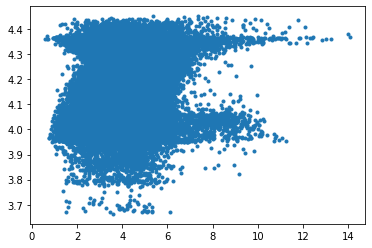

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, prediction, '.')
plt.show()

In [ ]:
df.to_csv(r'/content/drive/My Drive/df.csv')

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X1 = modelInput_copy[["yards_gained", "touchdown","two_point_conv_result", "fourth_down_converted", "penalty_yards", "interception", "fumble_lost", "sack", "return_touchdown", "punt_blocked", "game_seconds_remaining"]]
y1 = modelInput_copy["GEI"]
game1X1_test = game1_test[["yards_gained", "touchdown","two_point_conv_result", "fourth_down_converted", "penalty_yards", "interception", "fumble_lost", "sack", "return_touchdown", "punt_blocked", "game_seconds_remaining"]]
game1y1_test = game1_test["GEI"]

#X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=4)

reg = linear_model.BayesianRidge()
reg.fit(X1, y1)

prediction1 = reg.predict(game1X1_test)
mean_squared_error(prediction1, game1y1_test)

df1 = pd.DataFrame( {"Actual": game1y1_test, "Predicted": prediction1})
print(reg.coef_)

[-3.09112610e-05 -1.11623590e-01  2.73840222e-02 -1.70056945e-01
  1.55775515e-03 -2.46538542e-02  2.80966905e-02 -4.29935160e-02
  6.57468376e-02  7.53085398e-03  1.19780457e-04]


In [19]:
from sklearn.metrics import r2_score
print(mean_squared_error(game1y1_test, prediction1))
print(r2_score(game1y1_test, prediction1))
print(df1)

0.7490242669159926
-8.787581422911067
          Actual  Predicted
385498  3.653437   4.375253
385499  2.721610   4.370257
385500  3.156649   4.369593
385501  3.188759   4.364473
385502  2.666382   4.359118
...          ...        ...
385632  3.405747   3.963842
385633  3.430630   3.920250
385634  3.423396   3.848474
385635  3.812854   3.986972
385636  4.211284   3.959650

[139 rows x 2 columns]


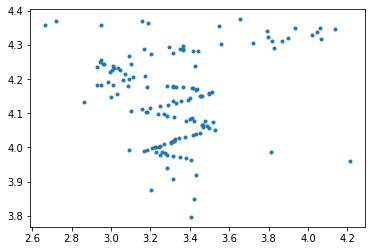

In [20]:
import matplotlib.pyplot as plt
plt.plot(game1y1_test, prediction1, '.')
plt.show()

In [13]:
df1.to_csv(r'/content/drive/My Drive/df1.csv')

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X2 = modelInput_copy[["yards_gained","touchdown", "fourth_down_converted", "interception", "fumble_lost", "sack", "return_touchdown", "punt_blocked", "game_seconds_remaining"]]
y2 = modelInput_copy["GEI"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.25, random_state=42)

regr = svm.SVR()
regr.fit(X2_train, y2_train)

prediction2 = regr.predict(X2_test)
mean_squared_error(prediction2, y2_test)

df2 = pd.DataFrame( {"Actual": y2_test, "Predicted": prediction2})


In [ ]:
from sklearn.metrics import r2_score
print(mean_squared_error(y2_test, prediction2))
print(r2_score(y2_test, prediction2))
print(df2)

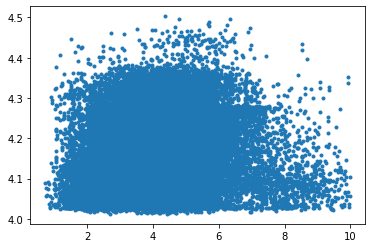

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y2_test, prediction2, '.')
plt.show()

In [ ]:
df2.to_csv(r'/content/drive/My Drive/df2.csv')

In [ ]:
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])

reg.coef_

reg.intercept_

In [ ]:
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = modelInput_copy[["yards_gained","touchdown", "fourth_down_converted", "interception", "fumble_lost", "sack", "return_touchdown", "punt_blocked", "game_seconds_remaining"]]
y = modelInput_copy["GEI"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

reg1 = TweedieRegressor(power=1, alpha=0.5, link='log')
reg1.fit(X_train, y_train)

prediction3 = reg1.predict(X_test)
mean_squared_error(prediction3, y_test)

df3 = pd.DataFrame( {"Actual": y_test, "Predicted": prediction1})
print(re1.coef_)

ImportError: ignored

method for manipulating df to get wp_difference and wp_sum

In [ ]:
modelInput = pd.DataFrame()
manipulate = pd.DataFrame()
for i in df_dict:
  manipulate = df_dict[i]
  print(np.dtype(manipulate))
  test(index, manipulate)

In [ ]:
game1 = nflDataset.loc[nflDataset['game_id'] == 2009091000]
game1["wp_difference"] = "0.0"

Cleaning up play_type

In [ ]:
"""game1 = game1[game1.play_type.notnull()]
game1 = game1[game1.play_type != "no_play"]



Creating game1_copy df which has only desired columns





In [ ]:
"""game1_copy = pd.DataFrame
game1_copy = game1[["game_id", "home_team", "away_team","yards_gained", "qb_scramble","touchdown","two_point_conv_result", "fourth_down_converted", "kick_distance", "replay_or_challenge_result", "penalty_yards", "interception", "fumble_lost", "sack", "return_touchdown", "punt_blocked", "game_seconds_remaining", "wp_difference", "play_type", "home_wp"]] 

In [ ]:
"""print(pd.unique(nflDataset["two_point_conv_result"]))
print(nflDataset["two_point_conv_result"].dtypes)

In [ ]:
"""print(pd.unique(game1_copy["play_type"]))

Cleaning up two_point_conv_result

In [ ]:
"""for i, play in game1_copy.iterrows():
  if (math.isnan(play["two_point_conv_result"])):
    game1_copy["two_point_conv_result"][i]=0
  if str(play["two_point_conv_result"]) == "failure":
    game1_copy["two_point_conv_result"][i]=-1
  if str(play["two_point_conv_result"]) == "success":
    game1_copy["two_point_conv_result"][i]=1

Cleaning up penalty_yards

In [ ]:
"""for i, play in game1_copy.iterrows():
  if (math.isnan(play["penalty_yards"])):
    game1_copy["penalty_yards"][i]=0

Cleaning up yards_gained


In [ ]:
"""print(pd.unique(game1_copy["yards_gained"]))
print(game1_copy["qb_scramble"].dtypes)
#since all values in this column are numerical, no cleaning necessary

Cleaning up qb_scramble


In [ ]:
"""print(pd.unique(game1_copy['qb_scramble']))
print(game1_copy["qb_scramble"].dtypes)
#since all values in this column are binary, no cleaning necessary

Cleaning up touchdown


In [ ]:
"""print(pd.unique(game1_copy["touchdown"]))
print(game1_copy["qb_scramble"].dtypes)
#since all values of this column are binary (touchdown or no touchdown for a play) no cleaning necessary

Cleaning up fourth_down_converted

In [ ]:
"""print(pd.unique(game1_copy["fourth_down_converted"]))
#no fourth down conversion attempts in this game

Clean up kick_distance

In [ ]:
"""print(pd.unique(game1_copy["kick_distance"]))
for i, play in game1_copy.iterrows():
  if (math.isnan(play["kick_distance"])):
    game1_copy["kick_distance"][i]= -1 #no kick attempted on play

Cleaning up replay_or_challenge_result

In [ ]:
"""print(pd.unique(game1_copy["replay_or_challenge_result"]))
for i, play in game1_copy.iterrows():
  if (math.isnan(play["replay_or_challenge_result"])):
    game1_copy["replay_or_challenge_result"][i]= -1 #no replays or challenge

In [ ]:
"""game1_copy.reset_index(drop=True, inplace = True)

Cleaning up return_touchdown

In [ ]:
"""print(pd.unique(game1_copy["return_touchdown"]))
for i, play in game1_copy.iterrows():
  if (math.isnan(play["return_touchdown"])):
    game1_copy["return_touchdown"][i]= -1
    #return touchdown was not 

Cleaning up punt_blocked

In [ ]:
"""print(pd.unique(game1_copy["punt_blocked"]))
for i, play in game1_copy.iterrows():
  if (math.isnan(play["punt_blocked"])):
    game1_copy["punt_blocked"][i]= -1
    #punt was neither blocked nor successful

In [ ]:
"""for i, play in game1_copy.iterrows():
  if i > 1:
    game1_copy['wp_difference'][i] = abs(game1_copy['home_wp'][i] - game1_copy['home_wp'][i-1])

In [ ]:
"""game1_copy["wp_sum"] = 0.0
for i, play in game1_copy.iterrows():
  if (i > 1):
    game1_copy["wp_sum"][i] = game1_copy["wp_sum"][i-1] + game1_copy["wp_difference"][i]

In [ ]:
"""def gei(index,df):
  df['GEI'] = 0.0
  for i, play in df.iterrows():
    df["GEI"][i] =((3600.0/(3600.0-df["game_seconds_remaining"][i]))*(df["wp_sum"][i]))

In [ ]:
"""gei(i,game1_copy)
game1_copy["GEI"][0] = 0